## 3rd Iteration

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import MVP_Davila, MVP_Shi

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Acquire the train, validate and test

df_train = pd.read_csv('train.csv')
df_validate = pd.read_csv('validate.csv')
df_test = pd.read_csv('test.csv')

df_train.shape, df_validate.shape, df_test.shape

((411517, 18), (50842, 18), (52868, 18))

### Prepare to merge with the 1st part of the new features

In [3]:
# Drop the columns merged from questions.csv and lectures.csv

cols = ['lecture_id', 'tag', 'lecture_part', 'type_of', 'question_id',
        'bundle_id', 'correct_answer', 'question_part', 'tags']

df_train = df_train.drop(columns = cols)
df_validate = df_validate.drop(columns = cols)
df_test = df_test.drop(columns = cols)

In [4]:
# Add new features part one

train = MVP_Davila.sam_train_features(df_train)
validate = MVP_Davila.sam_valtest_features(train, df_validate)
test = MVP_Davila.sam_valtest_features(train, df_test)

train.shape, validate.shape, test.shape

((411517, 13), (50842, 12), (52868, 12))

### Prepare to merge with 2nd part of the new features

In [5]:
# Handle the null values

train = MVP_Shi.handle_null(train)
validate = MVP_Shi.handle_null(validate)
test = MVP_Shi.handle_null(test)

In [6]:
# Handle the inf values

train = MVP_Shi.handle_inf(train)
validate = MVP_Shi.handle_inf(validate)
test = MVP_Shi.handle_inf(test)

In [7]:
# Drop the lecture rows

train = MVP_Shi.drop_lecture_rows(train)
validate = MVP_Shi.drop_lecture_rows(validate)
test = MVP_Shi.drop_lecture_rows(test)

### Merge the 2nd part of the new features

In [8]:
# Merge the new features genereated from Shi

train = MVP_Shi.merge_with_stats_train(train)
validate = MVP_Shi.merge_with_stats_valortest(train, test)
test = MVP_Shi.merge_with_stats_valortest(train, test)

train.shape, validate.shape, test.shape

((403377, 17), (51971, 16), (51971, 16))

In [9]:
train.describe()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,user_acc_mean,user_lectures_running_total,last_q_time,avg_user_q_time,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy,mean_priortime_accuracy
count,4.033770e+05,4.033770e+05,403377.000000,403377.0,403377.000000,403377.000000,403377.000000,403377.000000,403377.000000,403377.000000,4.033770e+05,4.033770e+05,403377.000000,403377.000000,4.033770e+05,403377.000000
mean,5.859188e+09,1.083055e+09,4909.808978,0.0,775.945778,1.423648,0.650932,22337.224963,0.618786,24.149347,2.154219e+07,2.164148e+07,0.650932,0.650932,5.859188e+09,22337.224963
std,9.150535e+09,6.701989e+08,3194.956134,0.0,1244.564520,1.154007,0.476676,12709.206830,0.114756,41.946413,5.204644e+08,8.125608e+07,0.190522,0.092857,7.454578e+09,4062.743657
min,0.000000e+00,1.864702e+06,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,5.327000e+03,0.000000,0.000000,2.977167e+04,0.000000
25%,3.556216e+08,4.844761e+08,2064.000000,0.0,82.000000,0.000000,0.000000,15000.000000,0.565401,0.000000,3.218100e+04,2.791188e+06,0.528302,0.632065,8.761729e+08,19732.608696
50%,1.769623e+09,1.059277e+09,4837.000000,0.0,299.000000,1.000000,1.000000,20000.000000,0.631980,6.000000,6.453900e+04,7.350150e+06,0.666667,0.657110,2.190232e+09,22800.143113
75%,7.585258e+09,1.685634e+09,6948.000000,0.0,897.000000,3.000000,1.000000,28260.000000,0.697571,28.000000,1.703140e+05,1.519769e+07,0.793651,0.684564,9.826310e+09,25100.297436
max,6.212613e+10,2.145493e+09,13522.000000,0.0,9176.000000,3.000000,1.000000,65500.000000,1.000000,250.000000,6.171021e+10,4.955140e+09,1.000000,1.000000,5.435084e+10,43125.000000


### Exploration

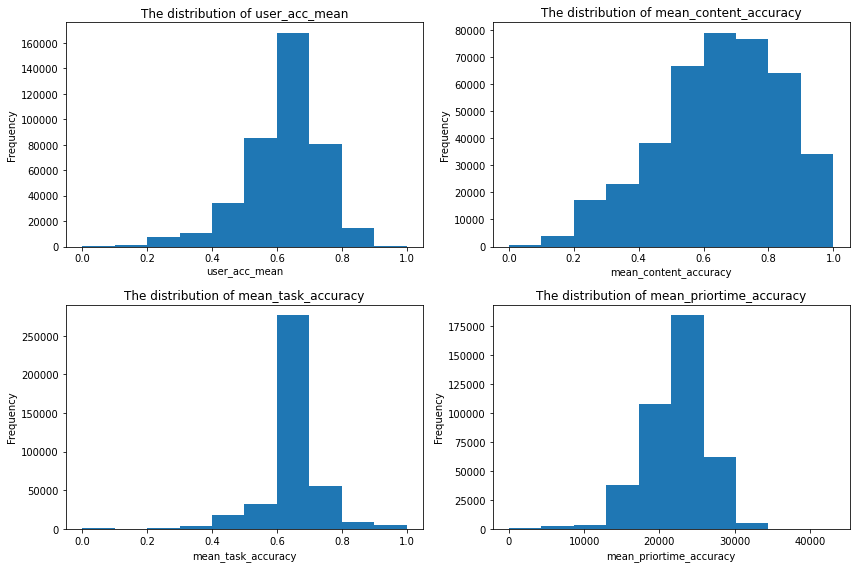

In [10]:
# Plot the distribution of columns: 
# user_acc_mean, mean_content_accuracy, mean_task_accuracy, mean_priortime_accuracy

cols = ["user_acc_mean", "mean_content_accuracy", "mean_task_accuracy", "mean_priortime_accuracy"]

fig, axs = plt.subplots(2,2, figsize=(12,8))

ax = axs.ravel()

for i, col in zip(range(4),cols):
    train[col].plot(kind="hist", ax=ax[i])
    ax[i].set_xlabel(col)
    ax[i].set_title(f"The distribution of {col}")
    
plt.tight_layout()

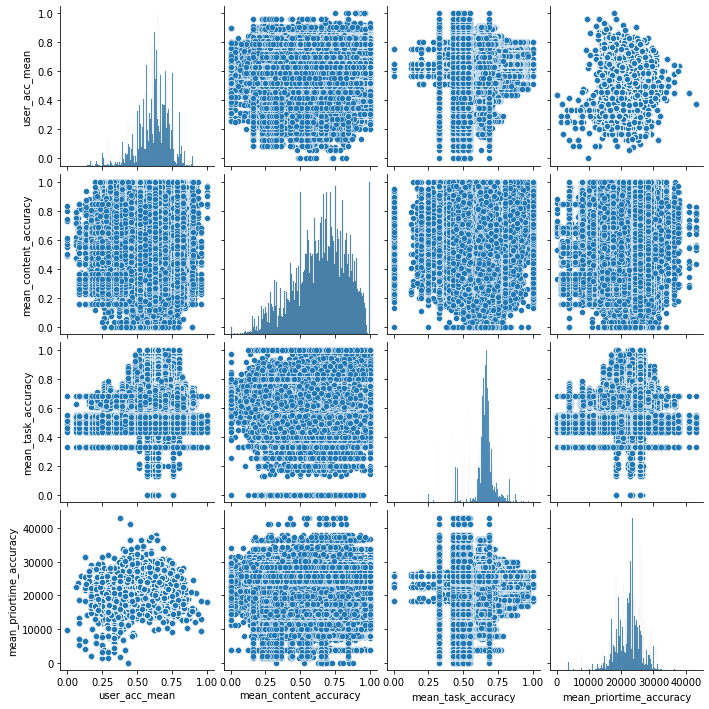

In [11]:
# Pairplot of the columns:
# user_acc_mean, mean_content_accuracy, mean_task_accuracy, mean_priortime_accuracy

cols = ["user_acc_mean", "mean_content_accuracy", "mean_task_accuracy", "mean_priortime_accuracy"]
sns.pairplot(train[cols])
plt.show()

In [31]:
# Create the function to return a feature

def feature_over_time(feature, train, agg_method):
    feature_on_time = pd.DataFrame(train.groupby("timestamp")[feature].agg([agg_method]))
    feature_on_time.reset_index(inplace=True)
    feature_on_time.rename(columns={agg_method:feature}, inplace=True)
    
    feature_on_time['seconds'] = (feature_on_time.timestamp/1000).round(0)
    feature_on_time['minutes'] = (feature_on_time.timestamp/(1000*60)).round(0)
    feature_on_time['hours'] = (feature_on_time.timestamp/(1000*60*60)).round(0)
    feature_on_time['days'] = (feature_on_time.timestamp/(1000*60*60*24)).round(0)
    feature_on_time['months'] = (feature_on_time.timestamp/(1000*60*60*24*30)).round(0)
    feature_on_time['years'] = (feature_on_time.timestamp/(1000*60*60*24*30*12)).round(0)
    
    return feature_on_time

In [32]:
user_id_on_time = feature_over_time("user_id", train, "sum")
user_id_on_time

,timestamp,user_id,seconds,minutes,hours,days,months,years
0,0,2194456286990,0.0,0.0,0.0,0.0,0.0,0.0
1,2323,1810652916,2.0,0.0,0.0,0.0,0.0,0.0
2,3376,290504393,3.0,0.0,0.0,0.0,0.0,0.0
3,3774,1946714629,4.0,0.0,0.0,0.0,0.0,0.0
4,4181,1953303148,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
304534,62126044341,1956346780,62126044.0,1035434.0,17257.0,719.0,24.0,2.0
304535,62126071559,1956346780,62126072.0,1035435.0,17257.0,719.0,24.0,2.0
304536,62126088966,1956346780,62126089.0,1035435.0,17257.0,719.0,24.0,2.0
304537,62126111572,1956346780,62126112.0,1035435.0,17257.0,719.0,24.0,2.0


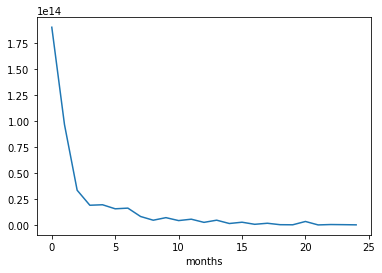

In [34]:
user_id_on_time.groupby("months").user_id.sum().plot()
plt.show()

In [35]:
accuracy_on_time = feature_over_time("answered_correctly", train, "mean")
accuracy_on_time

,timestamp,answered_correctly,seconds,minutes,hours,days,months,years
0,0,0.683375,0.0,0.0,0.0,0.0,0.0,0.0
1,2323,1.000000,2.0,0.0,0.0,0.0,0.0,0.0
2,3376,0.000000,3.0,0.0,0.0,0.0,0.0,0.0
3,3774,0.000000,4.0,0.0,0.0,0.0,0.0,0.0
4,4181,0.000000,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
304534,62126044341,1.000000,62126044.0,1035434.0,17257.0,719.0,24.0,2.0
304535,62126071559,1.000000,62126072.0,1035435.0,17257.0,719.0,24.0,2.0
304536,62126088966,0.000000,62126089.0,1035435.0,17257.0,719.0,24.0,2.0
304537,62126111572,0.000000,62126112.0,1035435.0,17257.0,719.0,24.0,2.0


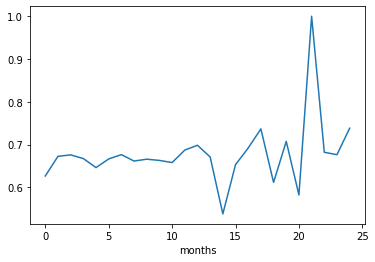

In [37]:
accuracy_on_time.groupby("months").answered_correctly.mean().plot()
plt.show()

In [38]:
last_q_on_time = feature_over_time("last_q_time", train, "mean")
last_q_on_time

,timestamp,last_q_time,seconds,minutes,hours,days,months,years
0,0,605304.812407,0.0,0.0,0.0,0.0,0.0,0.0
1,2323,2323.000000,2.0,0.0,0.0,0.0,0.0,0.0
2,3376,3376.000000,3.0,0.0,0.0,0.0,0.0,0.0
3,3774,3774.000000,4.0,0.0,0.0,0.0,0.0,0.0
4,4181,4181.000000,4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
304534,62126044341,32955.000000,62126044.0,1035434.0,17257.0,719.0,24.0,2.0
304535,62126071559,27218.000000,62126072.0,1035435.0,17257.0,719.0,24.0,2.0
304536,62126088966,17407.000000,62126089.0,1035435.0,17257.0,719.0,24.0,2.0
304537,62126111572,22606.000000,62126112.0,1035435.0,17257.0,719.0,24.0,2.0


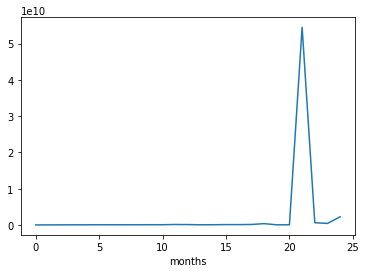

In [40]:
last_q_on_time.groupby("months").last_q_time.mean().plot()
plt.show()

### Drop the redundant columns

In [41]:
train = MVP_Shi.drop_columns_train(train)
validate = MVP_Shi.drop_columns_valortest(validate)
test = MVP_Shi.drop_columns_valortest(test)

### Fill the missing values

In [42]:
validate = MVP_Shi.fill_nulls(validate)
test = MVP_Shi.fill_nulls(test)

### Scale the columns

In [44]:
columns_to_scale = ['mean_timestamp_accuracy', 'mean_priortime_accuracy',
                    'user_lectures_running_total', 'avg_user_q_time']

scaler, train_scaled, validate_scaled, test_scaled = MVP_Shi.scale(train, 
                                                                   validate, 
                                                                   test, 
                                                                   columns_to_scale)

train_scaled.shape, validate_scaled.shape, test_scaled.shape

((403377, 9), (51971, 9), (51971, 9))

### Convert the boolean values to 0 and 1

In [45]:
train_scaled = MVP_Shi.boolean_to_num(train_scaled)
validate_scaled = MVP_Shi.boolean_to_num(validate_scaled)
test_scaled = MVP_Shi.boolean_to_num(test_scaled)

In [46]:
# Take a peek at the train_scaled
train_scaled.head()

,answered_correctly,prior_question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,1,0,0.630049,0.818182,0.682248,0.119858,0.515734,0.0,0.002404
1,0,0,0.630049,0.550000,0.534988,0.119858,0.515734,0.0,0.002404
2,1,0,0.630049,0.444444,0.445216,0.119858,0.515734,0.0,0.002404
3,1,0,0.630049,0.406250,0.544008,0.119858,0.515734,0.0,0.002404
4,0,0,0.630049,0.687500,0.485282,0.119858,0.515734,0.0,0.002404


In [47]:
# Print the descriptive statistics in train_scaled
train_scaled.describe()

,answered_correctly,prior_question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
count,403377.000000,403377.000000,403377.000000,403377.000000,403377.000000,403377.000000,403377.000000,403377.000000,403377.000000
mean,0.650932,0.892944,0.618786,0.650932,0.650932,0.107803,0.517965,0.096597,0.004366
std,0.476676,0.309185,0.114756,0.190522,0.092857,0.137157,0.094209,0.167786,0.016398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.565401,0.528302,0.632065,0.016120,0.457568,0.000000,0.000562
50%,1.000000,1.000000,0.631980,0.666667,0.657110,0.040298,0.528699,0.024000,0.001482
75%,1.000000,1.000000,0.697571,0.793651,0.684564,0.180794,0.582036,0.112000,0.003066
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Seperate the features and target

In [56]:
X_train = train_scaled.drop(columns='answered_correctly')
y_train = train_scaled['answered_correctly']

X_validate = validate_scaled.drop(columns='answered_correctly')
y_validate = validate_scaled['answered_correctly']

X_test = test_scaled.drop(columns='answered_correctly')
y_test = test_scaled['answered_correctly']

In [57]:
# Take a peek at the X_train
X_train.head(3)

,prior_question_had_explanation,user_acc_mean,mean_content_accuracy,mean_task_accuracy,mean_timestamp_accuracy_scaled,mean_priortime_accuracy_scaled,user_lectures_running_total_scaled,avg_user_q_time_scaled
0,0,0.630049,0.818182,0.682248,0.119858,0.515734,0.0,0.002404
1,0,0.630049,0.550000,0.534988,0.119858,0.515734,0.0,0.002404
2,0,0.630049,0.444444,0.445216,0.119858,0.515734,0.0,0.002404


In [58]:
# Take a peak at the y_train
y_train.head(3)

0    1
1    0
2    1
Name: answered_correctly, dtype: int64

### SelectKBest

In [53]:
from sklearn.feature_selection import SelectKBest, f_regression

# parameters: f_regression stats test, give me 4 features
f_selector = SelectKBest(f_regression, k=5)

# find the top 4 X's correlated with y
f_selector.fit(X_train, y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train.iloc[:,feature_mask].columns.tolist()

f_feature

['prior_question_had_explanation',
 'user_acc_mean',
 'mean_content_accuracy',
 'mean_task_accuracy',
 'mean_timestamp_accuracy_scaled']

### Modeling - Compute the baseline

In [54]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [67]:
def auc_curve_plot(clf, X, y):
    '''
    This function accepts y_validate or y_test and predict_proba or decision_function classifier attribute
    Example:
    ---------
    auc_mertic(actual_outcome=y_validate, decision_func=svc.decision_function(X_validate))
    Returns a plot of the ROC curve and Precision Recall Curve.
    Parameters
    ----------
    clf : The classification model fit with X_train, y_train
    X : X_validate or X_test
    y : y_validate or y_test
    Returns
    -------
    '''
    # Set the defaults
    sns.set_context('talk')

    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

    # Plot the roc curve
    plot_roc_curve(clf, X, y, ax=ax1)

    # Plot the precision recall curve
    plot_precision_recall_curve(clf, X, y, ax=ax2)
    
    plt.tight_layout()

### Baseline

### Logistic Regression

In [68]:
# Create the lr object and fit on train

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

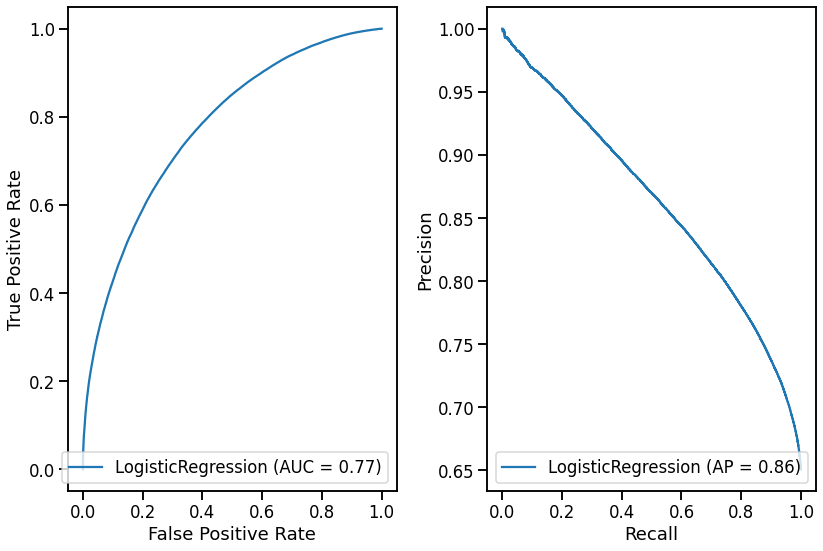

In [75]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(lr, X_train, y_train)

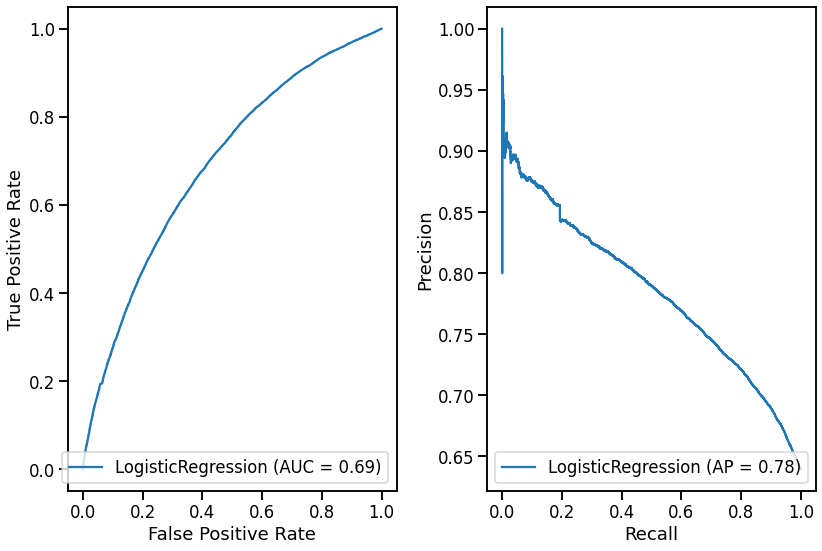

In [69]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(lr, X_validate, y_validate)

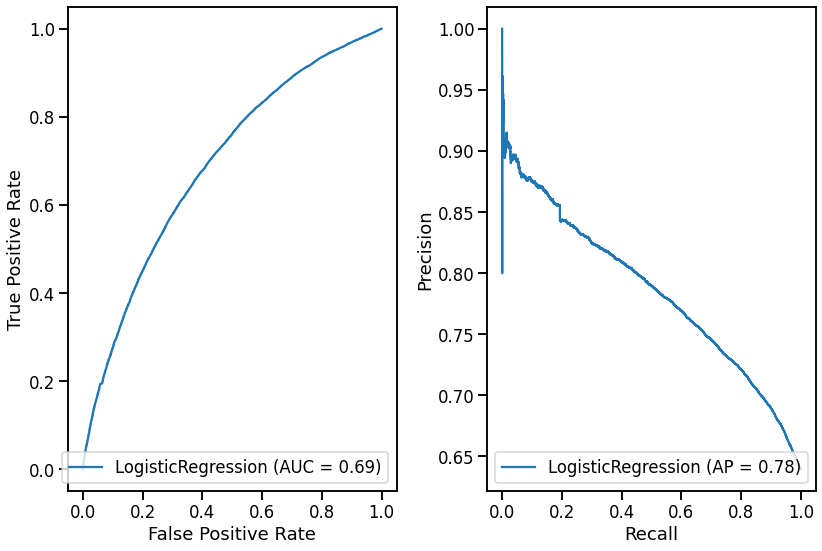

In [70]:
# Plot the AUC-ROC curve on test
auc_curve_plot(lr, X_test, y_test)

### Decision Tree

In [71]:
# Create the dtc object and fit on train

dtc = DecisionTreeClassifier(max_depth=3)
dtc = dtc.fit(X_train, y_train)

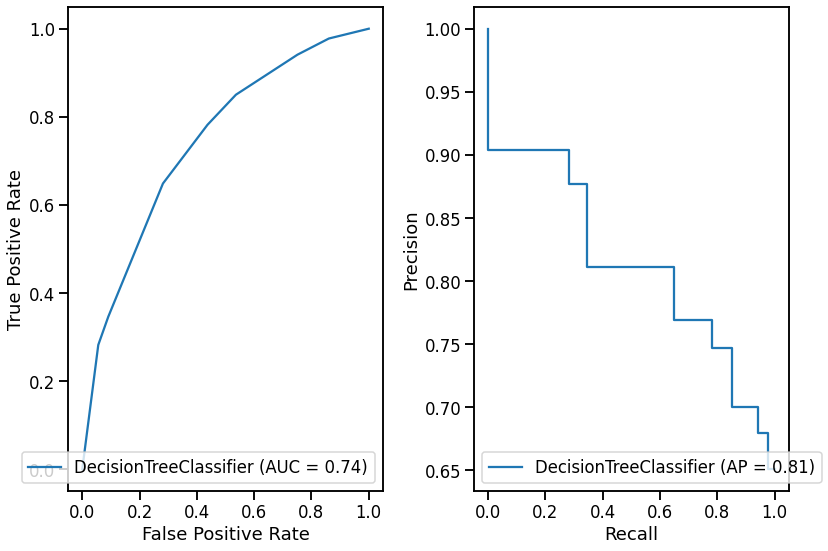

In [74]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(dtc, X_train, y_train)

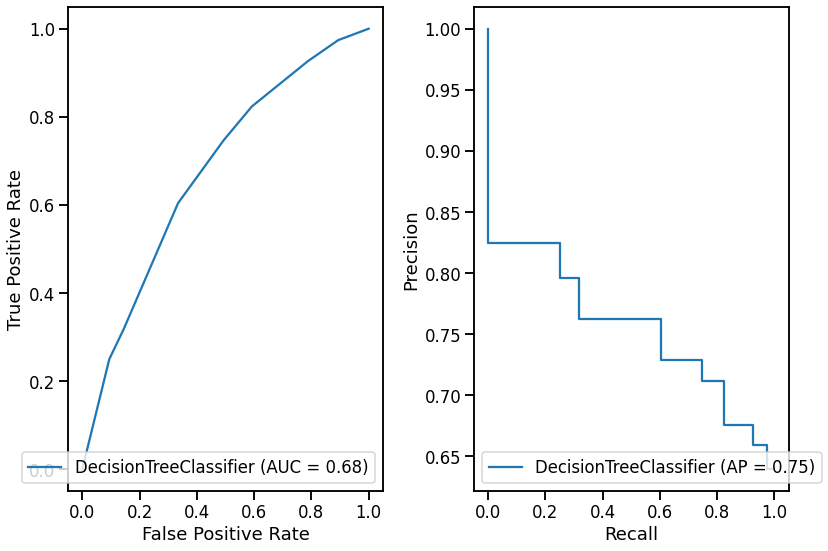

In [72]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(dtc, X_validate, y_validate)

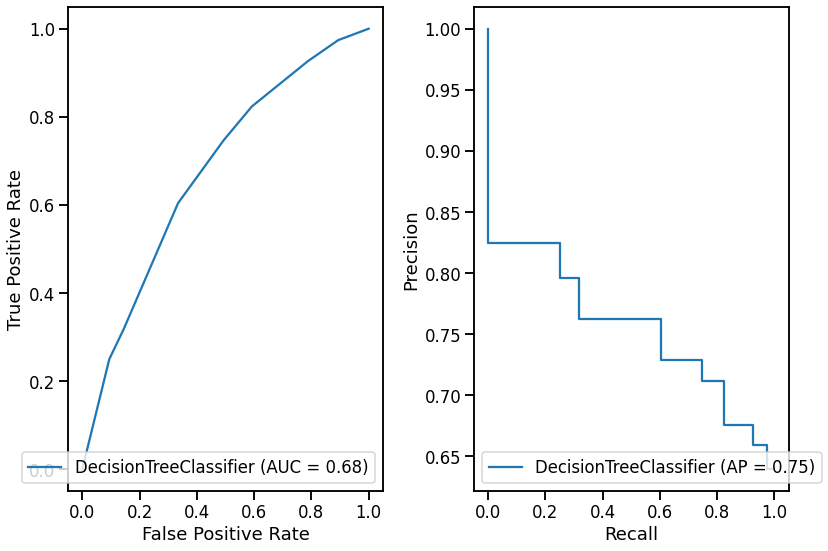

In [73]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(dtc, X_test, y_test)

### Random Forest

In [76]:
# Create the rfc object and fit on train

rfc = RandomForestClassifier(max_depth=3)
rfc = rfc.fit(X_train, y_train)

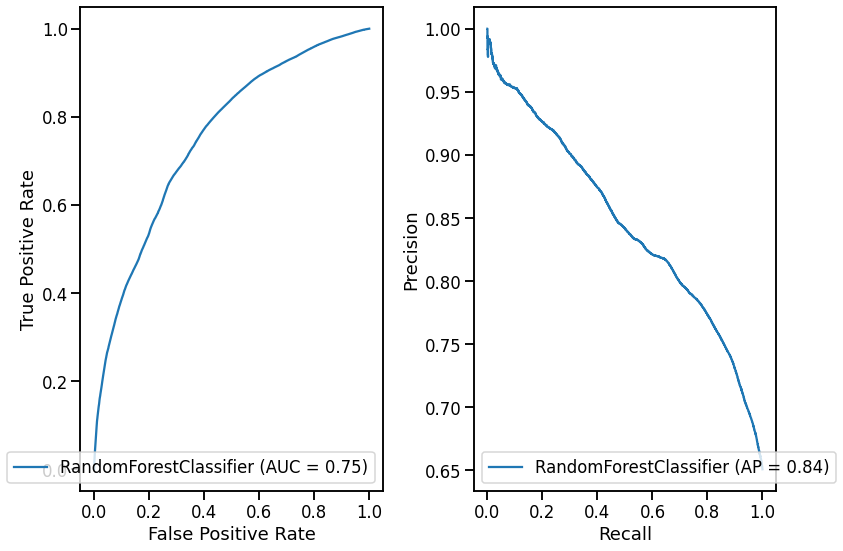

In [77]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(rfc, X_train, y_train)

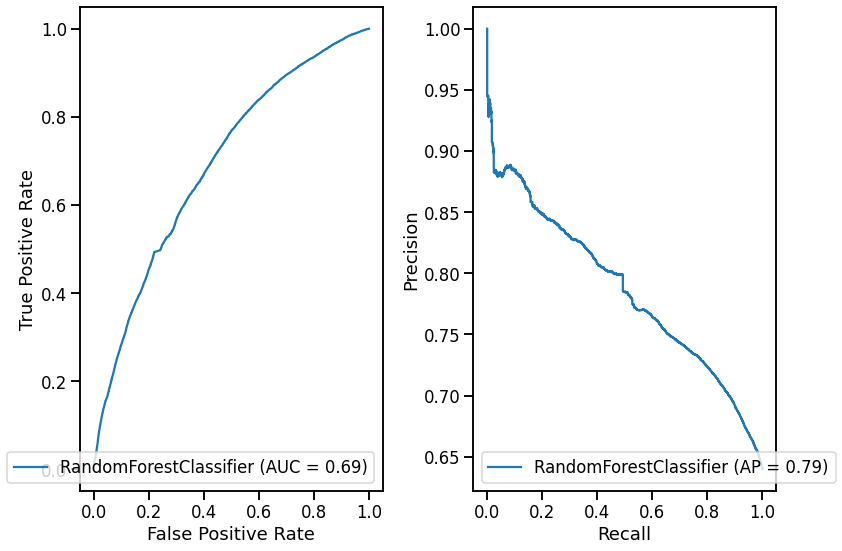

In [78]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(rfc, X_validate, y_validate)

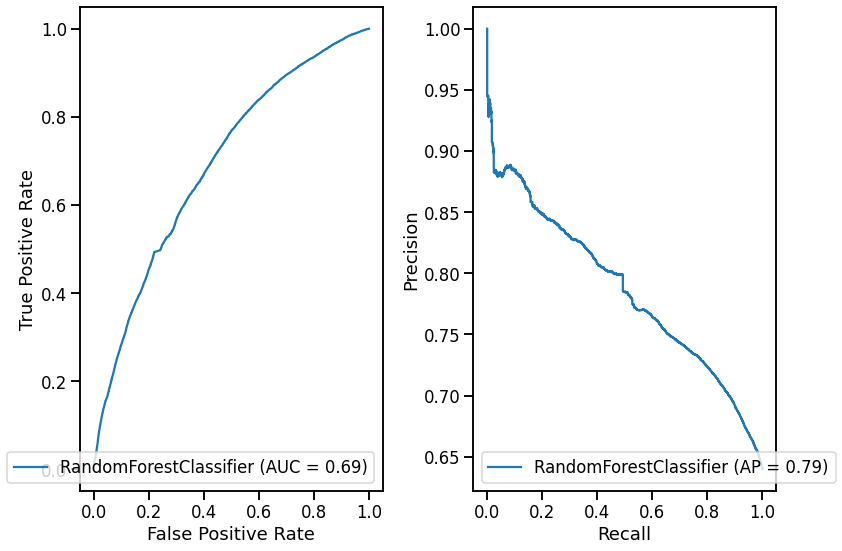

In [79]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(rfc, X_test, y_test)

### AdaBoost

In [88]:
# Create the AdaBoost object and fit on train

Ada = AdaBoostClassifier()
Ada = Ada.fit(X_train, y_train)

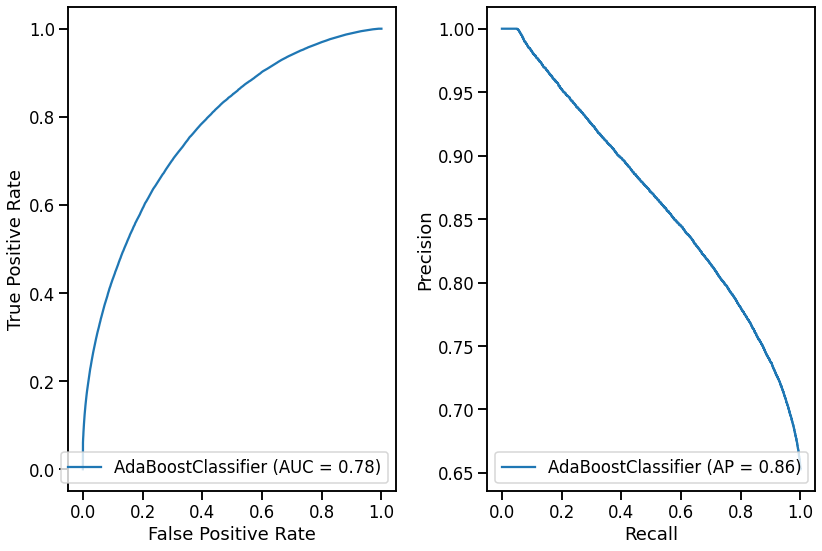

In [89]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(Ada, X_train, y_train)

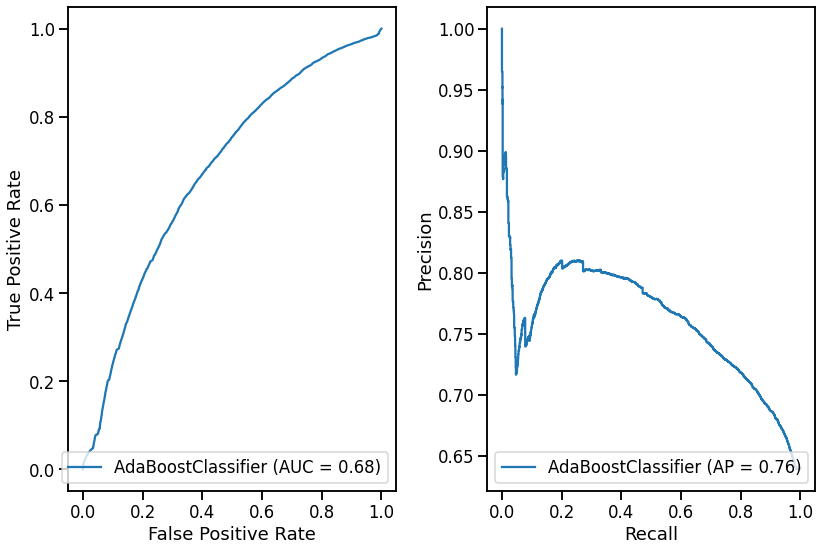

In [90]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(Ada, X_validate, y_validate)

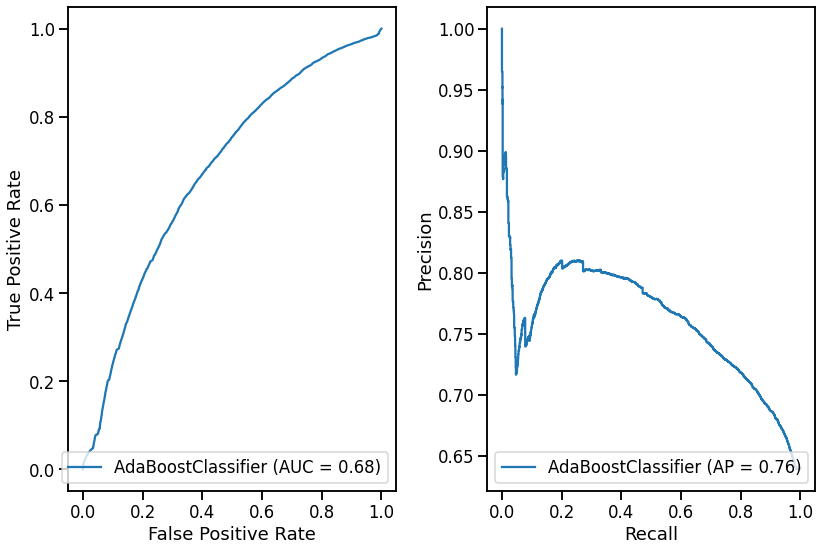

In [91]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(Ada, X_test, y_test)

### Gradient Boosting Classifer

In [84]:
# Create the GBC object and fit on train

gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train, y_train)

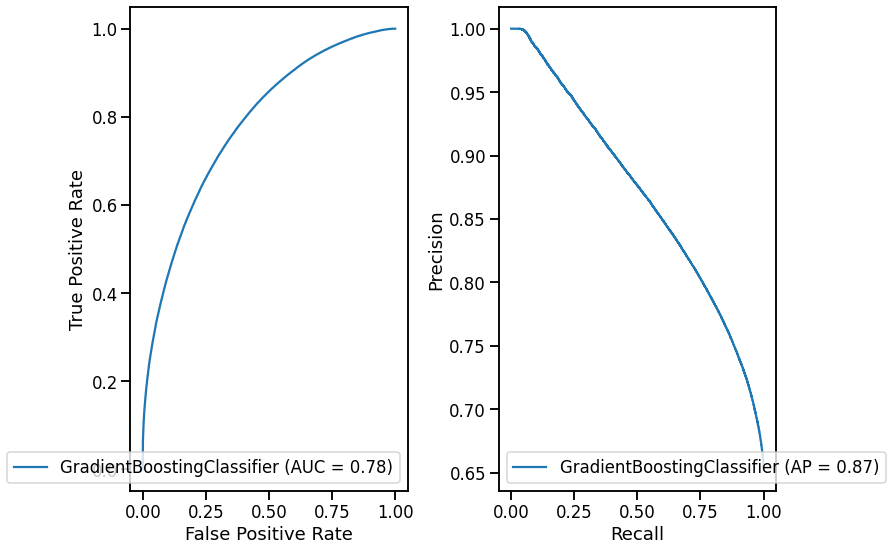

In [85]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(gbc, X_train, y_train)

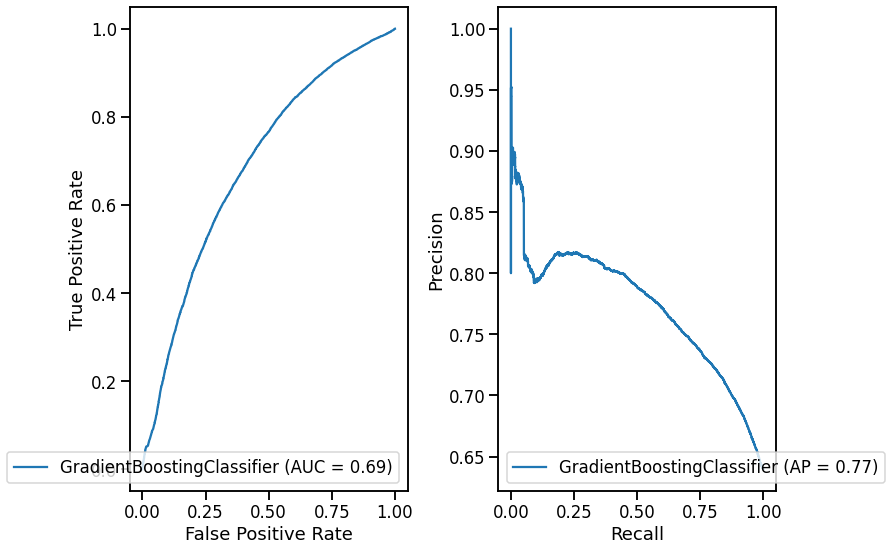

In [86]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(gbc, X_validate, y_validate)

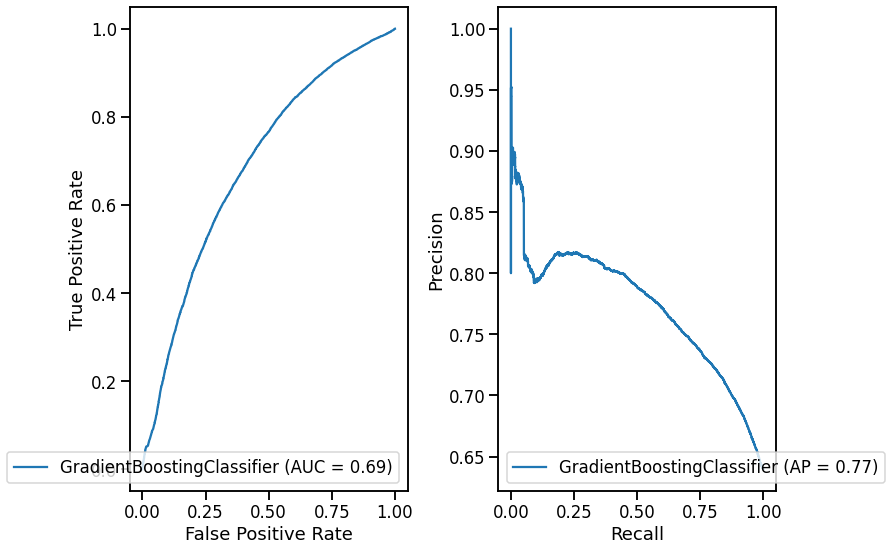

In [87]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(gbc, X_test, y_test)

### K Neighbors

In [92]:
# Create the KNN object and fit on train

knn = KNeighborsClassifier(3)
knn = knn.fit(X_train, y_train)

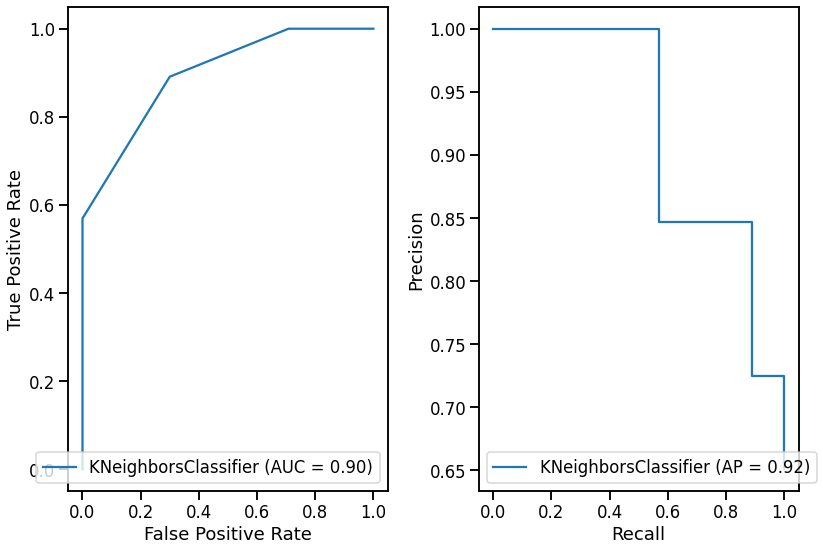

In [93]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(knn, X_train, y_train)

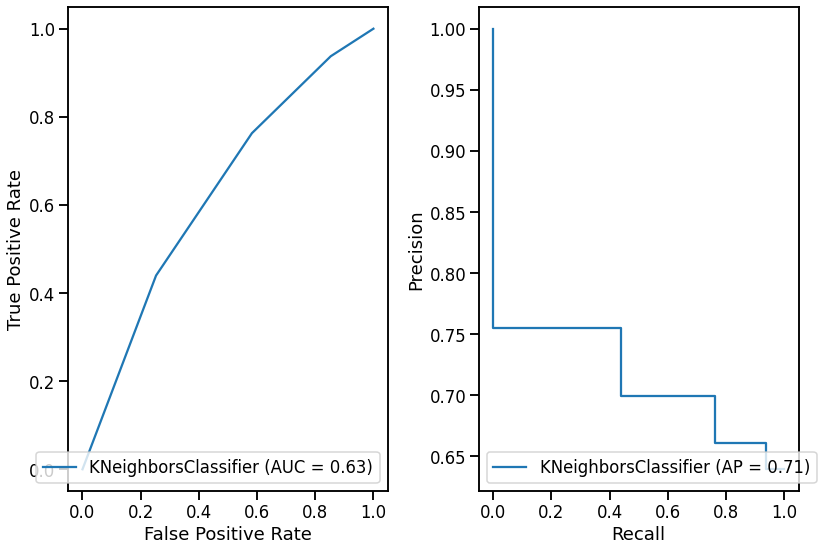

In [94]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(knn, X_validate, y_validate)

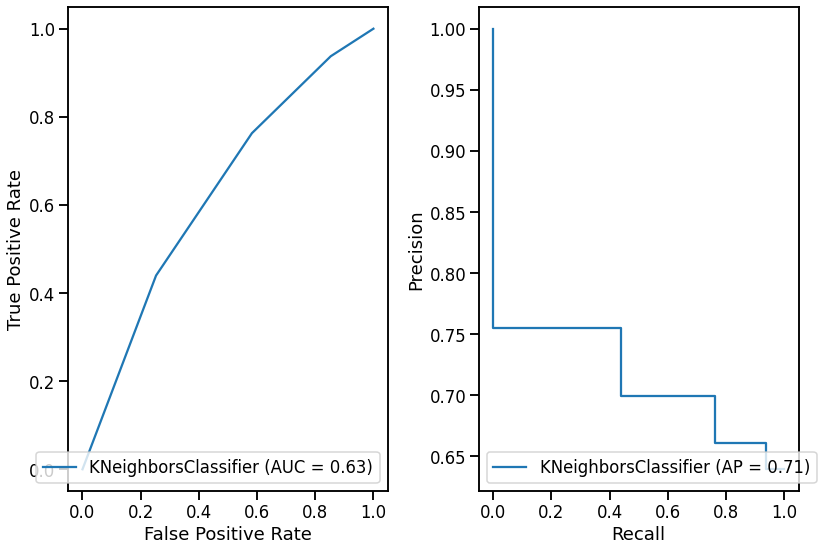

In [95]:
# Plot the AUC-ROC curve on validate
auc_curve_plot(knn, X_test, y_test)